In [1]:
#Assignment-1

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Input Adjacency Matrix

In [3]:
A = np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])

### Question 1 : Centrality 

### Implement degree, closeness, betweenness and eigenvector centrality in python. Your func-tions should take as input an adjacency matrix and return a list or vector of centrality values. You may focus on just undirected graphs. Do not simply invoke NetworkX functions.

### 1. Degree Centrality

In [4]:
# Function to calculate degree centrality
def degree_centrality(M):
    rows,column = M.shape
    degree_c = np.zeros(rows)
    
    for i in range (rows):
        degree = 0
        for j in range (column):
            degree += M[i,j]
        degree_c[i] = degree/(rows-1)
    
    return degree_c   

In [5]:
Degree_Centrality_output = degree_centrality(A)
print("Degree Centrality for the given Matrix :")
Degree_Centrality_output

Degree Centrality for the given Matrix :


array([ 0.375,  0.25 ,  0.375,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.375,
        0.125])

In [6]:
# This is just to check whether my code & in-built functions giving the same output or not.
#result = nx.degree_centrality(H)
#result

### 2.Closeness Centrality

In [7]:
# Function to calculate closeness centrality
def closeness_centrality(M):
    rows,columns = M.shape
    M_powers = [np.linalg.matrix_power(A,m) for m in range (rows)]
    shortest_paths = np.zeros((rows,columns))
    closeness_c = np.zeros(rows)
    
    #Calculate the length of shortest path from each node to every other node & store it in shortest_paths
    for i in range(rows):
        for j in range(columns):
            for x in range(rows):
                X = M_powers[x].copy()
                if X[i,j] > 0 and i != j:
                    shortest_paths[i,j] = x 
                    break
    
    #Calculating the closeness centrality for each node
    for i in range (rows):
        sum_of_all_shortest_path=0
        for j in range(columns):
                sum_of_all_shortest_path += shortest_paths[i,j]
        closeness_c[i] = (rows-1)/sum_of_all_shortest_path
    
    return closeness_c   

In [8]:
Closeness_Centrality_output = closeness_centrality(A)
print("Cloness Centrality for the given Matrix :")
Closeness_Centrality_output

Cloness Centrality for the given Matrix :


array([ 0.47058824,  0.34782609,  0.47058824,  0.61538462,  0.61538462,
        0.61538462,  0.5       ,  0.47058824,  0.34782609])

In [9]:
# This is just to check whether my code & in-built functions giving the same output or not.
#result = nx.closeness_centrality(H)
#result

### 3. Betweenness Centrality

In [10]:
# Function to calculate Betweenness centrality
#Code from Professor's file

def btwness_centrality(M):
    rows,column = M.shape
    A_powers = [np.linalg.matrix_power(M,m) for m in range(rows)]
    sigma = np.zeros((rows,column))
    min_lengths = np.zeros((rows,column))

    for i in range(rows):
        for j in range(column):
            for x in range(rows):
                X = A_powers[x].copy()
                if X[i,j] > 0 and i != j:
                    sigma[i,j] = X[i,j]
                    min_lengths[i,j] = x + 1
                    break
    btwn_values = [betweenness(x, M, min_lengths, sigma) for x in range(len(M))]
    return btwn_values
                
def sigma_through_jay(j, M, min_lengths, sigma):
    # Number of shortest paths through node j
    rows,column = M.shape
    B = M.copy()
    B[j] = np.zeros(rows)
    B[:,j] = np.zeros(rows)
    B_powers = [np.linalg.matrix_power(B,m) for m in range(rows)]
    B_sigma = np.zeros((rows,column))
    B_min_lengths = np.zeros((rows,column))
    for i in range(rows):
        for k in range(rows):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma)  

def betweenness(j, M, min_lengths, sigma):
    # Finally, the betweenness
    rows,column = M.shape
    sigst = sigma_through_jay(j, M, min_lengths, sigma)
    total = 0
    for i in range(rows):
        for k in range(i):
            if i != j and k != j:
                total += sigst[i,k] / sigma[i,k]
    # We return a single number.
    return total

In [12]:
print("Betweenness Centrality of the given matrix is :")
btwn_values = btwness_centrality(A)
btwn_values

Betweenness Centrality of the given matrix is :


[3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]

### 4. EigenVector Centrality

In [13]:
# Function to calculate Eigenvector Centrality
def eigenvector_centrality(M):
    eigenvalue,eigenvector = np.linalg.eig(M)

    max_index= np.argmax(M)
    #print(max_index)

    result = np.zeros(len(eigenvector))
    for i in range (len(eigenvector)):
        array = eigenvector[i]
        result[i] =array[max_index-1]
    return result

In [14]:
eigenvector_centrality_output = eigenvector_centrality(A)
eigenvector_centrality_output

1


array([ 0.1957488 ,  0.1116837 ,  0.1957488 ,  0.37874803,  0.46808548,
        0.46808548,  0.40997939,  0.38402038,  0.11695606])

In [14]:
# This is just to check whether my code & in-built functions giving the same output or not.
#result = nx.eigenvector_centrality(H)
#result

### Question 2: Graph Ploting

### Create a function that takes as input an adjacency matrix and plots in the notebook a depiction of the associated graph with eigenvector centrality represented by node size. Nodes should be represented as circles. In other words, learn how to produce diagrams like this one:

<img src="files/Assign1_graph.png">



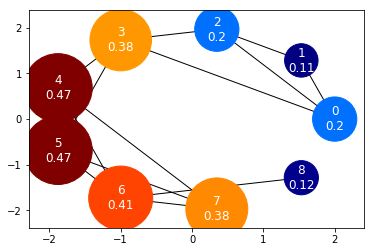

In [15]:
# Function to draw graph using adjacency matrix 
H = nx.from_numpy_matrix(A)
pos=nx.circular_layout(H,scale=2)

node_lables = nx.eigenvector_centrality(H)
node_sizes = node_lables.copy()

for i in range (len(node_lables)):
    node_sizes[i] = round(node_lables[i]*10000,2)

for i in range (len(node_lables)):
    node_lables[i] = str(i)+'\n'+str(round(node_lables[i],2))
nx.draw_networkx(H,pos,node_size=list(node_sizes.values()),node_color=list(nx.eigenvector_centrality(H).values()),cmap=plt.cm.jet,labels=node_lables,font_color='w')

plt.show()